In this section, we learn how to use merge and all the left join right join etc.

In [25]:
import pandas as pd
from datasets import load_dataset

import matplotlib.pyplot as plt

#loading data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.describe()
df.info()
df.iloc[0:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [26]:
#the code we will use to merge
df_US = df[(df.job_country == 'United States')]
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')

df_pivot = df.pivot_table(index = 'job_posted_month', columns='job_title_short', aggfunc = 'size')

In [27]:
#importing the data we will be merging
df_US_software = pd.read_csv('https://lukeb.co/software_csv' , index_col = 'job_posted_month')

In [28]:
df_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025
August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970
December,4038,1152,13583,13303,12024,1254,1799,2878,2431,3841
February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364
January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122
July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663
June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213
March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969


In [29]:
df_US_software

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [31]:
#We will be merging this data to our orginal data

#since df_US_software col is already sorted, i merge into that instead of df_pivot
merged_df = df_US_software.merge(df_pivot, on='job_posted_month')


In [35]:
#if you want to do like a value_count() in pivot table , use sum().index()

#getting the top 5 companies
top_5 = (  #so it can be broken down by lines
    merged_df
    .sum()
    .sort_values(ascending=False)
    .head(5).index  #list of names
)

In [37]:
merged_df = merged_df[top_5]

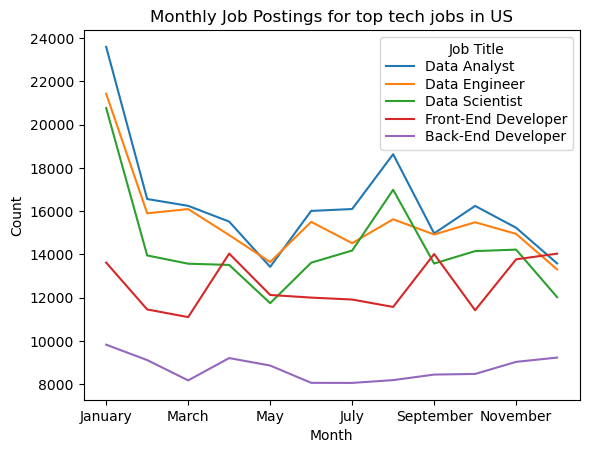

In [44]:
merged_df.plot(kind = 'line')
plt.title('Monthly Job Postings for top tech jobs in US')
plt.ylabel('Count')
plt.xlabel('Month')
plt.legend(title='Job Title', labelspacing = 0.25) #the legend was covering the data
plt.show()

.merge() is like joins in sql and it deals with columns. however, if we want to deal with rows, we can use the concat function to merge like rows. Its not shown here beacause the syntax is pretty simple. In addition, you can use .concat to merge different csv files (months) all together using the month columns. There is a parameters for ignore_index = True